In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def countCircles(img: np.array):
  # clone image
  og = img.copy();
  # convert image to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # image smoothing
  blur = cv2.GaussianBlur(gray,(11,11),0)
  # reducing unwanted noise while keeping edges fairly shapr
  # for more information visit https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html
  bilateralFilter = cv2.bilateralFilter(blur, 20, 75, 75)
  # apply canny edge detector
  canny = cv2.Canny(bilateralFilter, 100, 150)
  # apply morphological operation (Dilation) to accentuate edges
  dilated = cv2.dilate(canny, (1, 1), iterations=0)

  # retrieves edges
  (cnt, hierarchy) = cv2.findContours(
      dilated.copy(), 
      cv2.RETR_EXTERNAL, 
      cv2.CHAIN_APPROX_NONE
  )

  rgb = cv2.cvtColor(og, cv2.COLOR_BGR2RGB)
  count = 0
  for entry in cnt:
      # approximate contour to polygone
      polygone = cv2.approxPolyDP(entry, .03 * cv2.arcLength(entry, True), True)
      vertex = len(polygone);
      if vertex > 4 and cv2.isContourConvex(polygone):
          cv2.drawContours(rgb, entry, -1, (0, 255, 0), 2)
          count += 1

  fig, axs = plt.subplots(1, 2, figsize = (8,8))
  axs[0].imshow(og)
  axs[0].set_title('Original')
  axs[1].imshow(rgb)
  axs[1].set_title(f'{count} circles detected')

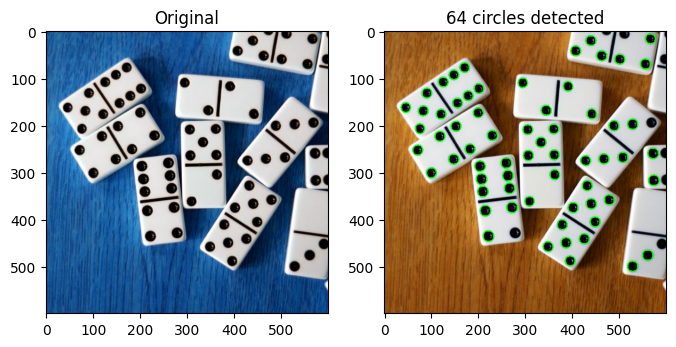

In [5]:
countCircles(cv2.imread('1.jpeg'))

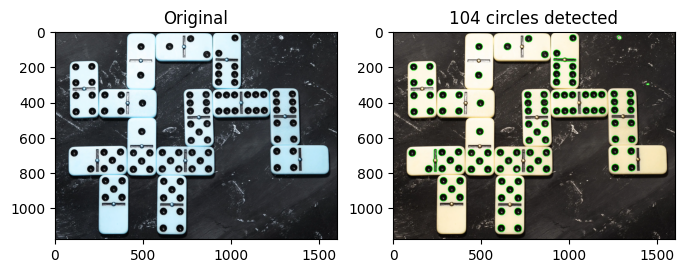

In [6]:
countCircles(cv2.imread('11.webp'))